#Demonstration of how to get data and ground motion parameters based on an epicentral location and event time
## Description
reviewData is a wrapper for [obspy](https://github.com/obspy/obspy/wiki) that reads in data from IRIS, NCEDC, sac files, or winston waveservers and allows for interactive plotting, processing, and manipulation of this data. It also allows you to find stations within a given radius that were running at a given time and attach metadata such as lat\lon, azimuth, backazimuth, and source to station distance by calling IRIS webservices or NCEDC.

The following sections illustrate how to grab data from certain station types based on an epicentral location and event time using the 2016 Taiwan earthquake as an example.

Note that this is a prototype module and is sure to have some bugs. If you encounter something that needs fixing, please contact kallstadt@usgs.gov
## Grabbing the data
First load in reviewData and define a few things

In [1]:
from reviewData import reviewData

# Define event parameters
event_lat = 22.83
event_lon = 120.625
event_time = '2016-02-05T19:57:26' # This can be in any UTCDateTime readable format

# Define what data to download
tstart = -3.  # sec to add to event_time for start of data
tend = +200.  # sec to add to event_time for end of data
channels = 'strong motion' # This gets accelerometer data (excluding low sample rate data)
distkm = 300.
source = 'IRIS' # The only other option currently is NCEDC

Now pull the raw data. This step will attach station response information (if available) that is needed for later steps.

In [2]:
st = reviewData.getepidata(event_lat, event_lon, event_time, tstart=tstart,
                           tend=tend, minradiuskm=0., maxradiuskm=distkm,
                           channels=channels, location='*', source=source)

Let's see what we got. print st will print a shortened version, but there is also an option to print the full list. Both are executed below

In [3]:
# See what we got
print st

24 Trace(s) in Stream:

IU.TATO.20.HN1 | 2016-02-05T19:57:23.018393Z - 2016-02-05T20:00:45.998393Z | 100.0 Hz, 20299 samples
...
(22 other traces)
...
TW.YULB..BLE | 2016-02-05T19:57:23.019500Z - 2016-02-05T20:00:45.969500Z | 20.0 Hz, 4060 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [4]:
print(st.__str__(extended=True))

24 Trace(s) in Stream:
IU.TATO.20.HN1 | 2016-02-05T19:57:23.018393Z - 2016-02-05T20:00:45.998393Z | 100.0 Hz, 20299 samples
IU.TATO.20.HN2 | 2016-02-05T19:57:23.018393Z - 2016-02-05T20:00:45.998393Z | 100.0 Hz, 20299 samples
IU.TATO.20.HNZ | 2016-02-05T19:57:23.018393Z - 2016-02-05T20:00:45.998393Z | 100.0 Hz, 20299 samples
TW.KMNB..BLZ   | 2016-02-05T19:57:23.019500Z - 2016-02-05T20:00:45.969500Z | 20.0 Hz, 4060 samples
TW.KMNB..BLN   | 2016-02-05T19:57:23.019500Z - 2016-02-05T20:00:45.969500Z | 20.0 Hz, 4060 samples
TW.KMNB..BLE   | 2016-02-05T19:57:23.019500Z - 2016-02-05T20:00:45.969500Z | 20.0 Hz, 4060 samples
TW.NACB..BLE   | 2016-02-05T19:57:23.019500Z - 2016-02-05T20:00:45.969500Z | 20.0 Hz, 4060 samples
TW.NACB..BLN   | 2016-02-05T19:57:23.019500Z - 2016-02-05T20:00:45.969500Z | 20.0 Hz, 4060 samples
TW.NACB..BLZ   | 2016-02-05T19:57:23.019500Z - 2016-02-05T20:00:45.969500Z | 20.0 Hz, 4060 samples
TW.SSLB..BLZ   | 2016-02-05T19:57:23.019500Z - 2016-02-05T20:00:45.969500Z | 20.

In [5]:
# Check to make sure the response information was actually attached
st[0].stats

         network: IU
         station: TATO
        location: 20
         channel: HN1
       starttime: 2016-02-05T19:57:23.018393Z
         endtime: 2016-02-05T20:00:45.998393Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 20299
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'record_length': 512, 'encoding': u'STEIM2', 'filesize': 243200, u'dataquality': u'M', 'number_of_records': 475, 'byteorder': u'>'})
      processing: [u"ObsPy 0.10.2: detrend(options={}::type='linear')", u'ObsPy 0.10.2: trim(endtime=None::fill_value=0::nearest_sample=True::pad=True::starttime=2016-02-05T19:57:23.019500Z)']
        response: Channel Response
	From M/S**2 (Acceleration in Meters Per Second Per Second) to COUNTS (Digital Counts)
	Overall Sensitivity: 427986 defined at 1.000 Hz
	3 stages:
		Stage 1: PolesZerosResponseStage from M/S**2 to V, gain: 1.0204
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 419430
		Stage 3: CoefficientsTypeR

It is good practice to actually look at the data before blindly calculating ground motion parameters. reviewData.InteractivePlot allows one to browse through the data and delete any traces that should not be included in the calculations. Here is how it is run, note that it does not work in IPython Notebook (hence the errors below), it must be run in IPython with pylab, so either start up by typing ipython --pylab or type %pylab once you are in ipython. It will not embed in ipython notebook but will instead open a new window

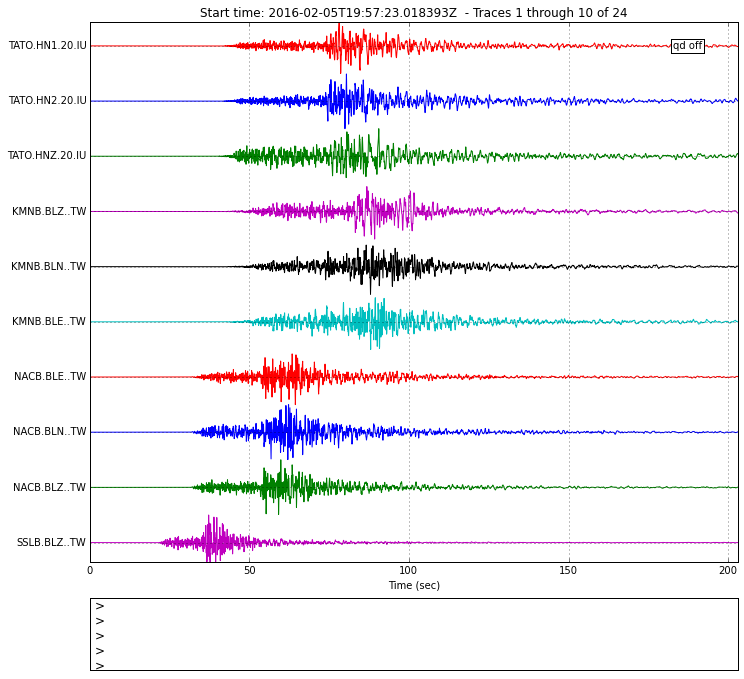


        up - double scaling
        down - half scaling
        right - move forward
        left - go back
        A - make amplitude pick
        B - box zoom
        C - station correction
        D - scroll down a trace
        E - envelopes
        F - bandpass filter
        G - spectrogram current window
        H - show or hide help menu (toggle)
        I - show or hide processing summary (toggle)
        J - change number of traces shown
        K - kurtosis (not working yet)
        L - make pseudoenergy pick
        M - change norm mode
        O - delete selected trace (X to reset)
        P - make P phase pick (N cancels)
        Q - quit
        R - previous view
        S - make S phase pick (N cancels)
        T - print timestamp
        U - scroll up a trace
        V - undo data change
        W - change window len
        X - reset to original data
        Z - zoom x-only
        + - page down
        - - page up
        @ - toggle quickdraw (default on, may be slo

NotImplementedError: 

In [9]:
%matplotlib inline
zp = reviewData.InteractivePlot(st)
st = zp.st  # Pulls original data with deleted ones deleted

If you wanted to look at the data after station corrections are applied, you need to tell InteractivePlot how to correct the data. For example, to do a station correction to acceleration with no prefiltering, run the following code and press "c" to apply the station correction interactively.

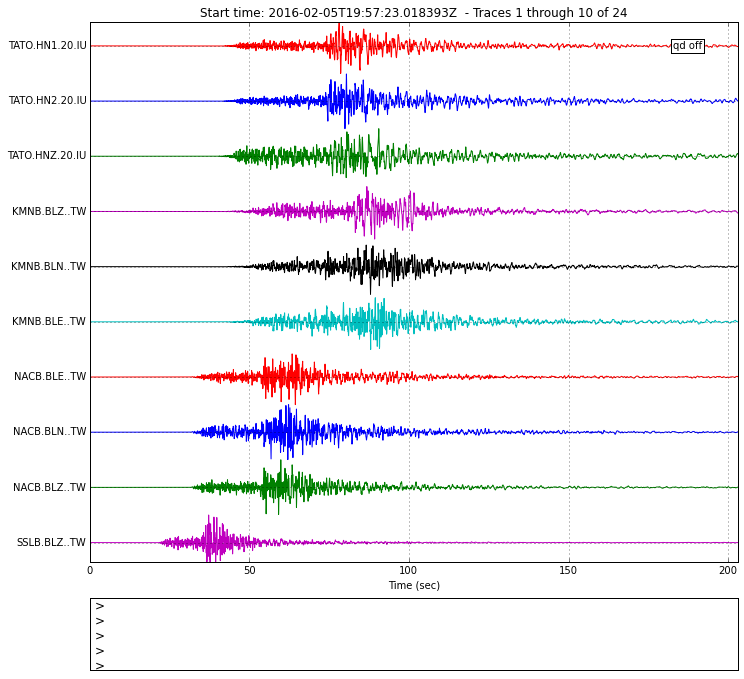


        up - double scaling
        down - half scaling
        right - move forward
        left - go back
        A - make amplitude pick
        B - box zoom
        C - station correction
        D - scroll down a trace
        E - envelopes
        F - bandpass filter
        G - spectrogram current window
        H - show or hide help menu (toggle)
        I - show or hide processing summary (toggle)
        J - change number of traces shown
        K - kurtosis (not working yet)
        L - make pseudoenergy pick
        M - change norm mode
        O - delete selected trace (X to reset)
        P - make P phase pick (N cancels)
        Q - quit
        R - previous view
        S - make S phase pick (N cancels)
        T - print timestamp
        U - scroll up a trace
        V - undo data change
        W - change window len
        X - reset to original data
        Z - zoom x-only
        + - page down
        - - page up
        @ - toggle quickdraw (default on, may be slo

NotImplementedError: 

In [10]:
zp = reviewData.InteractivePlot(st, cosfilt=None, output='ACC')

## Calculating Ground motion parameters
There are a number of options for calculating ground motion parameters. This demo shows all of them at once. This code will attach lats and lons, perform the station correction specified in the inputs, calculate Peak Ground Acceleration, Peak Ground Velocity, and Peak Spectral Acceleration at the specified periods and save those in the stats dictionary of each trace. It will also print them to the screen if verbal=True and output them in a csv file is a csvfile name is specified. In all cases, even if pga, pgv and psa are all set to False, it will output the corrected traces, stacc corrected to acceleration (m/s^2) and stvel corrected to velocity (m/s).

In [11]:
stacc, stvel = reviewData.getpeaks(st, pga=True, pgv=True, psa=True,
                                   periods=[0.3, 1.0, 3.0], damping=0.05,
                                   cosfilt=None, water_level=60., verbal=True,
                                   csvfile='test.csv')

IU.TATO.20.HN1 - PGA = 0.019 m/s
IU.TATO.20.HN2 - PGA = 0.016 m/s
IU.TATO.20.HNZ - PGA = 0.009 m/s
TW.KMNB..BLZ - PGA = 0.016 m/s
TW.KMNB..BLN - PGA = 0.016 m/s
TW.KMNB..BLE - PGA = 0.012 m/s
TW.NACB..BLE - PGA = 0.015 m/s
TW.NACB..BLN - PGA = 0.011 m/s
TW.NACB..BLZ - PGA = 0.015 m/s
TW.SSLB..BLZ - PGA = 0.065 m/s
TW.SSLB..BLN - PGA = 0.076 m/s
TW.SSLB..BLE - PGA = 0.087 m/s
TW.TPUB..BLN - PGA = 0.665 m/s
TW.TPUB..BLE - PGA = 0.597 m/s
TW.TPUB..BLZ - PGA = 0.283 m/s
TW.TWGB..BLZ - PGA = 0.105 m/s
TW.TWGB..BLN - PGA = 0.134 m/s
TW.TWGB..BLE - PGA = 0.216 m/s
TW.YHNB..BLZ - PGA = 0.020 m/s
TW.YHNB..BLN - PGA = 0.029 m/s
TW.YHNB..BLE - PGA = 0.035 m/s
TW.YULB..BLZ - PGA = 0.038 m/s
TW.YULB..BLN - PGA = 0.072 m/s
TW.YULB..BLE - PGA = 0.046 m/s
IU.TATO.20.HN1 - PGV = 0.004 m/s
IU.TATO.20.HN2 - PGV = 0.004 m/s
IU.TATO.20.HNZ - PGV = 0.002 m/s
TW.KMNB..BLZ - PGV = 0.004 m/s
TW.KMNB..BLN - PGV = 0.003 m/s
TW.KMNB..BLE - PGV = 0.002 m/s
TW.NACB..BLE - PGV = 0.002 m/s
TW.NACB..BLN - PGV = 0.002 

This outputs a csvfile, name specified in inputs, containing all these measurements (to greater precision than printed out) that can be opened in excel or imported to another function.

Here is how the ground motion parameters are attached to each trace

In [12]:
stacc[0].stats.gmparam

AttribDict({'pgv': 0.0039885651082792201, 'psa': [0.036727871157022883, 0.065666171553561276, 0.018062871690572063], 'periods': [0.3, 1.0, 3.0], 'pga': 0.019034867834434168})

To just get the traces corrected for station response with lats and lons attached:

In [13]:
stacc, stvel = reviewData.getpeaks(st, pga=False, pgv=False, psa=False, csvfile=None)

In [14]:
print stacc[0].stats.coordinates  # Elevation is in meters

AttribDict({'latitude': 24.9735, 'elevation': 160.0, 'longitude': 121.4971})
